# Diagrammatic Differentiation

Given a tensor diagram with variables, we compute its gradient as a formal sum of diagrams.

A theory paper is soon to be published.

## Parametrised tensors with sympy

We can compute tensors with symbolic expressions, then substitute variables with some concrete values.

Note that substitution is a functor, i.e. it respects composition.

In [1]:
from sympy.abc import x, y, z

from discopy import Dim, Tensor, drawing

vector = Tensor(Dim(1), Dim(2), [x ** 2 + 1, y + z / 2])
matrix = Tensor(Dim(2), Dim(2), [x, y, z, x * y * z])

vector >> matrix

AssertionError: 

In [ ]:
s = {(x, 3), (y, 2), (z, 1)}

assert (vector >> matrix).subs(s)\
    == vector.subs(s) >> matrix.subs(s)
(vector >> matrix).subs(s)

## Symbolic gradients with sympy

We can apply sympy's `diff` method element-wise on a Tensor.

Note that taking gradients is _not_ a functor, it satisfies the product rule.

In [ ]:
print(vector)
print("--[dx]--> {}".format(vector.grad(x)))
print("--[dy]--> {}".format(vector.grad(y)))
print("--[dz]--> {}".format(vector.grad(z)))

In [ ]:
(vector >> matrix).grad(x)

In [ ]:
vector.grad(x) >> matrix.grad(x)

In [ ]:
# Gradients of composition are given by the product rule.
assert (vector >> matrix).grad(x)\
    == (vector.grad(x) >> matrix)\
    + (vector >> matrix.grad(x))

## Tensor diagrams

Instead of computing gradients of parametrised tensors symbolically,
we want to compute gradients of diagrams valued in parametrised tensors.


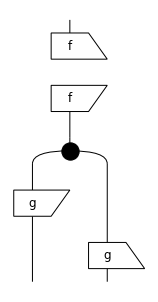

In [8]:
from discopy.tensor import Id, Box, Spider

f = Box('f', Dim(1), Dim(2), [x ** 2 + 1, 1 / x])
g = Box('g', Dim(2), Dim(2), [-x, 1, -1, x / 2])
diagram = f.dagger() >> f >> Spider(1, 2, Dim(2)) >> g @ g.dagger()
diagram.draw(figsize=(2, 4), draw_type_labels=False)

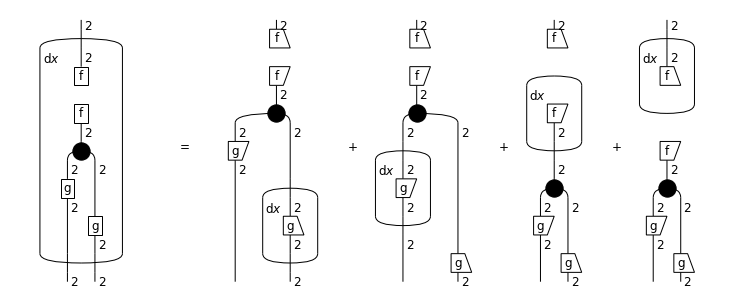

In [9]:
drawing.equation(diagram.bubble(drawing_name="d$x$"), diagram.grad(x), space=2, figsize=(10, 4))

In [10]:
from numpy import vectorize
from sympy import lambdify

def lambdify(diagram, *variables):
    if isinstance(diagram, Box):
        def lambdified(*args):
            func = vectorize(lambda expr: lambdify(expr, *variables)(*args))
            return Box(diagram.name, diagram.dom, diagram.cod, func(diagram.array))
        return lambdified
    return lambda *args:\
        Id(diagram.dom).then(*(
            Id(left) @ lambdify(box)(*args) @ Id(right)
            for left, box, right in diagram.layers))

In [11]:
lambdify(diagram, x)(0)

AssertionError: 